## Probabilistic programming

- Using the computer for random experiments
- Very good for understanding
- Also used routinely when providing confidence intervals etc.
- The basis for any Monte-Carlo methods
- Important for any further statistical work including Bayesian data analysis

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

## Probabilistic programming

- What does this mean?

   Can we have a program generate output randomly?

- Can we write a function that generates 0 or 1 randomly
- Such that each occurs often enough?
- Can use the built-in random number generator

In [2]:
np.random.randint(low=0, high=2, size=50)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1], dtype=int32)

## Let us create a 4 sided die

- We write a little function called `tet` to do this

In [3]:
def tet(size=1):
    return np.random.randint(low=1, high=5, size=size)

In [4]:
tet(10)

array([3, 4, 2, 2, 2, 4, 2, 4, 4, 4], dtype=int32)

## Uniformly distributed random numbers
- Use `np.random.random`: RVs in the range (0, 1)


In [5]:
np.random.random(5)

array([0.69091235, 0.88992387, 0.94901551, 0.48480656, 0.45173084])

In [6]:
# size can be any shape.
np.random.random((3, 3))

array([[0.02377255, 0.99590484, 0.80073574],
       [0.09078873, 0.87425822, 0.46908171],
       [0.49958689, 0.12504707, 0.07028719]])

In [7]:
x = np.random.random(size=10000)

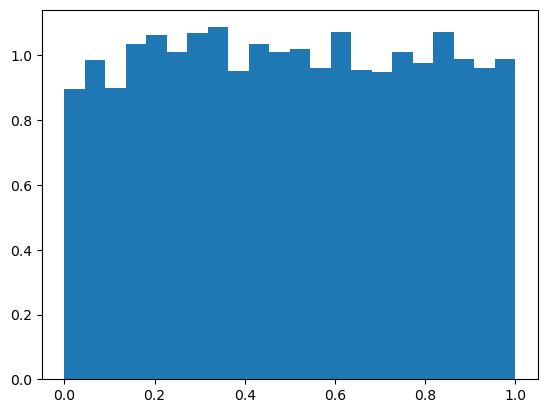

In [8]:
plt.hist(x, bins='auto', density=True);

### Exercise

- Generate Random variates in the region (-1, 1) using `np.random.random`?

(array([12., 10., 12.,  5., 16.,  9., 13.,  8.,  4., 11.]),
 array([-4.86224669, -3.87876652, -2.89528634, -1.91180616, -0.92832599,
         0.05515419,  1.03863436,  2.02211454,  3.00559472,  3.98907489,
         4.97255507]),
 <BarContainer object of 10 artists>)

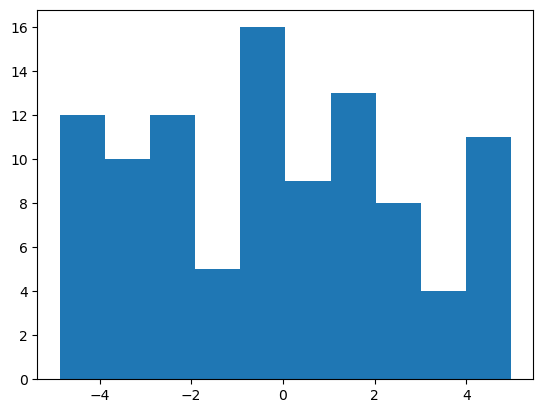

In [9]:
# Solution
x = np.random.random(100)
y = 10*x -5
u,c = np.unique(y, return_counts=True)
u, c
plt.hist(y)

(array([0.52022822, 0.48944773, 0.48488766, 0.48906773, 0.50920805,
        0.53124839, 0.50426797, 0.48792771, 0.48868772, 0.47766755,
        0.49134776, 0.52440829, 0.49818787, 0.48792771, 0.53124839,
        0.52060823, 0.51376812, 0.49438781, 0.51072807, 0.50274794,
        0.48830772, 0.50882804, 0.49856788, 0.50540799, 0.49780787,
        0.49172777, 0.50084791, 0.49818787, 0.5000879 , 0.49514782,
        0.48982774, 0.49438781, 0.50730802, 0.50692801, 0.47234746,
        0.49058775, 0.49818787, 0.49780787]),
 array([-9.99973474e-01, -9.47342727e-01, -8.94711980e-01, -8.42081232e-01,
        -7.89450485e-01, -7.36819738e-01, -6.84188991e-01, -6.31558243e-01,
        -5.78927496e-01, -5.26296749e-01, -4.73666002e-01, -4.21035254e-01,
        -3.68404507e-01, -3.15773760e-01, -2.63143012e-01, -2.10512265e-01,
        -1.57881518e-01, -1.05250771e-01, -5.26200233e-02,  1.07239633e-05,
         5.26414712e-02,  1.05272219e-01,  1.57902966e-01,  2.10533713e-01,
         2.63164460e-0

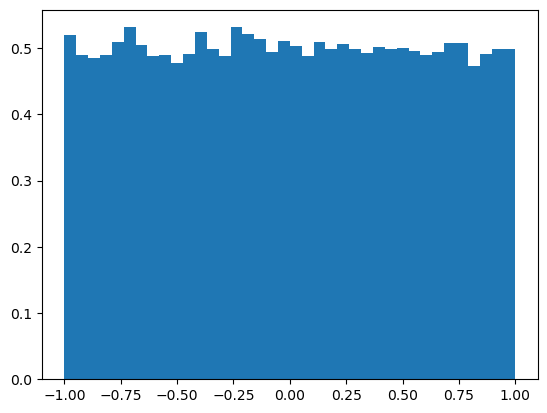

In [10]:
# Solution
x = np.random.random(50000)
y = 2*x -1
plt.hist(y, bins='auto', density=True)

## Normally distributed random numbers

- Use `np.random.normal`

In [11]:
x = np.random.normal(loc=0.0, scale=1.0, size=10000)

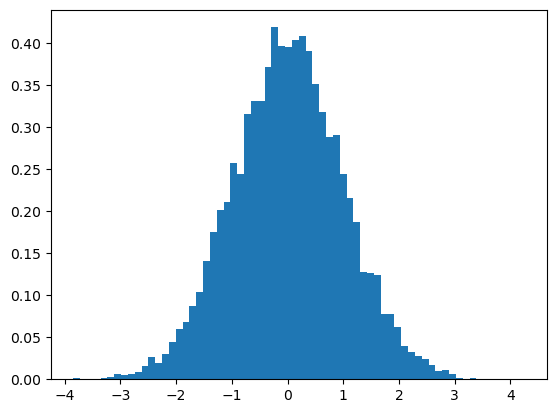

In [12]:
plt.hist(x, bins='auto', density=True);

## How does the computer generate a random number?

- Are they really random?
- How do you tell?
- First let us think about how you can tell?

- You need to see how the numbers are distributed

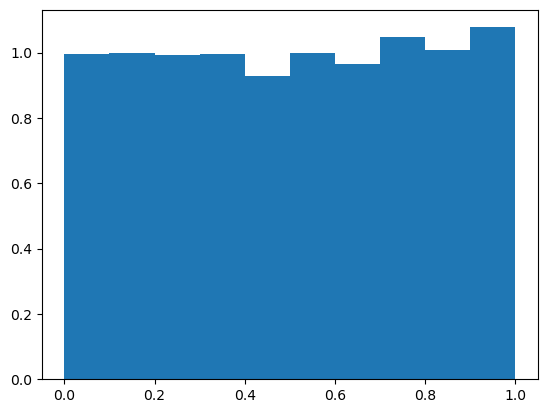

In [13]:
x = np.random.random(10000)
plt.hist(x, density=True);

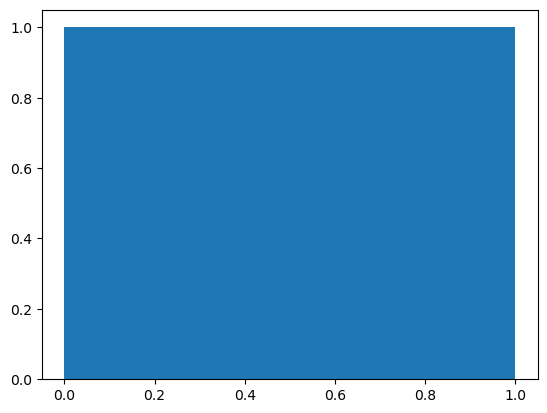

In [14]:
x1 = np.linspace(0, 1, 10000)
plt.hist(x1, density=True);

(array([ 995.,  998.,  993.,  994.,  927.,  997.,  964., 1046., 1009.,
        1077.]),
 array([2.54041145e-05, 1.00006711e-01, 1.99988018e-01, 2.99969325e-01,
        3.99950632e-01, 4.99931939e-01, 5.99913246e-01, 6.99894553e-01,
        7.99875860e-01, 8.99857167e-01, 9.99838474e-01]),
 <BarContainer object of 10 artists>)

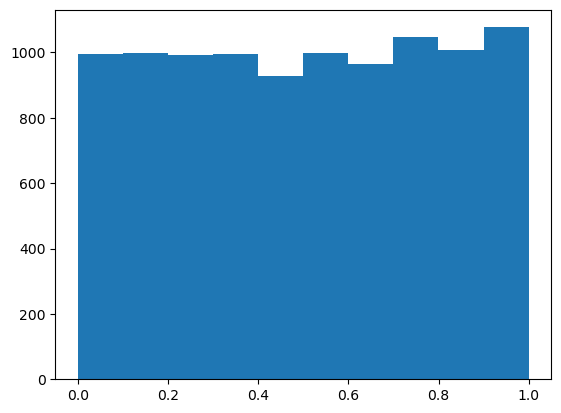

In [15]:
plt.hist(x)

## What is going on?

- How can you tell the difference?
- Clearly histograms are not enough
- The numbers must not be correlated!
- In the case of `x1`, given one number we know the next (all the rest)

## Pseudo RNG

- Computer generates pseudo random numbers
- Not really random but pretty much indistinguishable
- Pseudo-random number generators are non-trivial
- Don't write own without doing lots of research

## But we want repeatability!

- Important thing about computers!
- Reliable, repeatable
- Easier to debug, no randomness

## `random.seed` to the rescue

- Use `random.seed(number)` to set the seed

In [16]:
np.random.random(5)

array([0.12993312, 0.82467506, 0.7206583 , 0.8212865 , 0.61024367])

In [17]:
np.random.seed(123)
np.random.random(5)

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897])

## Using `np.random.choice`


In [18]:
events = [0, 1]
np.random.choice(events, size=20)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [19]:
# Can also do this!
events = ['H', 'T']
np.random.choice(events, size=20)

array(['H', 'T', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H',
       'T', 'T', 'T', 'H', 'H', 'H', 'H'], dtype='<U1')

### The case of a biased coin


In [20]:
np.random.choice(events, size=100, p=[0.1, 0.9])

array(['T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'H', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T',
       'T', 'T', 'H', 'T', 'T', 'T', 'T', 'T', 'T'], dtype='<U1')

This is useful even when sampling at random from some data.
For example:

In [21]:
data = range(900, 1000)
np.random.choice(data, size=10)

array([981, 962, 967, 911, 926, 992, 975, 910, 903, 945])

In [22]:
# Without replacement
np.random.choice(data, size=10, replace=False)

array([922, 929, 954, 979, 912, 983, 970, 943, 913, 947])

## Other useful functions
- `np.random.permutation`
- `np.random.shuffle`

In [23]:
data = np.random.randint(0, 100, size=5)

In [24]:
np.random.shuffle(data)

In [25]:
np.random.permutation(10)

array([0, 2, 4, 1, 6, 3, 5, 8, 9, 7], dtype=int32)

## Other distributions
So far we have seen:

- `randint`: integers uniformly distributed
- `random`: uniformly distributed (0, 1)
- `normal`: Normally distributed (defaults: 0 mean, 1 variance)

These all provide samples from such a distribution.

There are many more distributions that numpy provides we look at a few.


In [26]:
# Discrete RV.
arr1 = np.random.binomial(10, 0.25, size=30)
print(arr1)
print(np.average(arr1))

[1 2 2 3 0 4 3 3 3 3 1 2 1 3 3 3 2 2 4 1 1 2 0 2 2 2 2 4 3 3]
2.2333333333333334


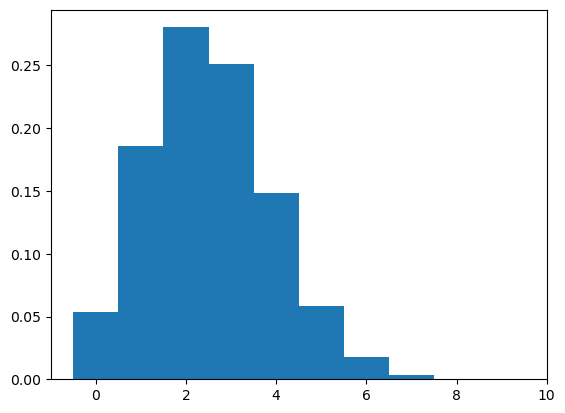

In [27]:
data = np.random.binomial(10, 0.25, size=10000)
# Note the parameters!
plt.hist(data, bins=range(11), density=True, align='left');

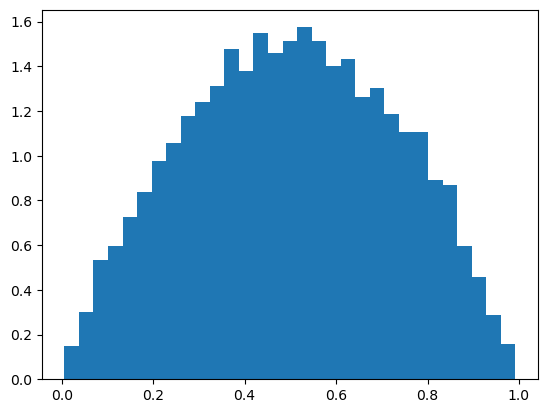

In [28]:
# A continuous distribution, the Beta distribution
data = np.random.beta(2, 2, size=10000)
plt.hist(data, bins='auto', density=True);

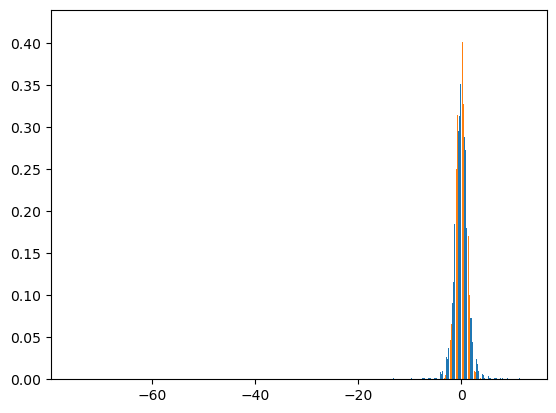

In [29]:
# The Standard T distribution
n = 10000
data_t = np.random.standard_t(4,  size=n)
data_n = np.random.normal(size=n)
plt.hist((data_t, data_n), bins='auto', density=True);

## Using `scipy.stats`

- `np.random.xxx` provides random variates, or draws samples from a given
  distribution.
- `scipy.stats` provides a lot more conveniences.
- The [SciPy Stats
  reference](https://docs.scipy.org/doc/scipy/reference/stats.html) is worth
  checking out!
- The various distributions are objects which provide among other things:
  - `rvs()` - random variates
  - `pdf, cdf, mean, median, fit` etc.
  - `ppf` - inverse of the `cdf` etc.

This is very useful to understand a given distribution or use it for study.
Here is an example that we can study.

In [30]:
from scipy.stats import norm, binom, poisson
from ipywidgets import interact

In [54]:
def plot_binom(n, p):
    rv = binom(n, p)
    x = np.arange(0, n+1)
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    # Compare with a normal distribution
    mu, sigma = n*p, np.sqrt(n*p*(1-p))
#    x1 = np.linspace(0, n+1)
#    plt.plot(x1, norm.pdf(x1, loc=mu, scale=sigma), 'g--')

In [55]:
interact(plot_binom, n=(1, 100), p=(0.01, 0.99));

interactive(children=(IntSlider(value=50, description='n', min=1), FloatSlider(value=0.5, description='p', max…

Here is an example with a Poisson distribution.

In [33]:
def plot_poisson(lam=4):
    rv = poisson(lam)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999999999)
    x = np.arange(min, max)
    plt.plot(x, norm.pdf(x, loc=lam, scale=np.sqrt(lam)), 'g--')
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    plt.xlim(0, 50)


interact(plot_poisson, lam=(0.0, 100));

interactive(children=(FloatSlider(value=4.0, description='lam'), Output()), _dom_classes=('widget-interact',))

Here is an example with a T distribution.

In [34]:
from scipy.stats import t

def plot_t(n=1):
    rv = t(n)
    x = np.linspace(-5, 5, 200)
    #plt.figure(figsize=(20, 10))
    plt.plot(x, norm.pdf(x), 'g--')
    plt.plot(x, rv.pdf(x))


interact(plot_t, n=(1, 50));

interactive(children=(IntSlider(value=1, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

## Why is this useful?

- Can understand and study these distributions.
- Allows you to construct experiments with random variables.
- Can numerically explore very interesting and important questions.
- Gateway to look at [Monte-Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method)!

- Such methods can defeat the curse of dimensionality!

Let us look at a few practical(?) examples. :)

### Volume estimation

- Calculate the area of a sphere in d dimensions.
- We consider a single quadrant, so in 2-D we multiply by $2^d$
- Throw uniformly distributed points and see which fall inside the sphere.


In [35]:
x = np.random.random((5, 2))
x

array([[0.71825458, 0.18038981],
       [0.59076166, 0.75658925],
       [0.45561146, 0.77168208],
       [0.99503239, 0.341371  ],
       [0.75467095, 0.0535935 ]])

In [36]:
np.linalg.norm(x)

np.float64(1.9879526942723822)

In [37]:
np.linalg.norm(x, axis=1)

array([0.74056068, 0.9599097 , 0.89614454, 1.05196179, 0.75657155])

In [38]:
np.linalg.norm(x, axis=1) < 1.0

array([ True,  True,  True, False,  True])

In [39]:
n = 100000
(np.linalg.norm(np.random.random((n, 2)), axis=1) < 1).sum()/n*2**2

np.float64(3.13516)


- This will work as you increase the number of dimensions.
- Impossibly hard to do with normal numerical integration.

### Statistical computations

- Given Sachin's (or Virat Kohli's if you prefer) scores in our `data/`
  directory.
- Let us say he is going to play in a ODI series of 5 games.
- Estimate what you think he will score on average with an 80% confidence
  interval.

In [40]:
# Live solution and discussion.
scores = np.loadtxt("../data/kohli.txt")

In [41]:
np.random.choice(scores, size=5)

array([ 1., 32.,  2., 85., 32.])

In [42]:
nr = 10000
avg_5 = []
for i in range(nr):
    avg_5.append(np.mean(np.random.choice(scores, size=5)))

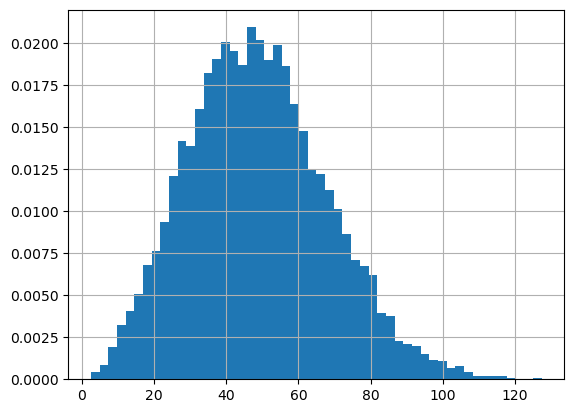

In [43]:
# check the distribution.
plt.hist(avg_5, bins='auto', density=True)
plt.grid();

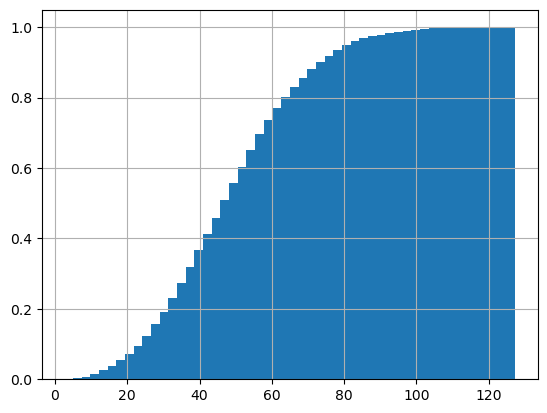

In [44]:
plt.hist(avg_5, bins='auto', density=True, cumulative=True)
plt.grid();

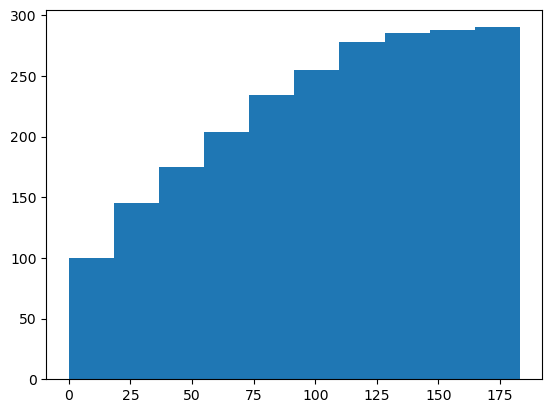

In [45]:
plt.hist(np.sort(scores), cumulative=True);

In [46]:
# so to exclude 10% on either side, we can also take percentile. So lower bound is 10% and higher bound is 90 %.
# So 80% probability of Kohli scording between 25 and 74 in next 5 match
np.percentile(avg_5, [10,90])

array([24.8, 74.4])


As you can see we can answer some profound practical questions using this
sort of approach.

In [47]:
from ipywidgets import interact

In [48]:
def get_avg_n(n, nr):
    avg_n = []
    for i in range(nr):
        avg_n.append(np.mean(np.random.choice(scores, size=n)))
    return avg_n

@interact(n=(1,30), nr=[10, 100, 1000, 10000])
def draw_n_scores(n, nr):
    plt.hist(get_avg_n(n, nr), bins='auto', density=True)
    plt.grid()
plt.show()

interactive(children=(IntSlider(value=15, description='n', max=30, min=1), Dropdown(description='nr', options=…